In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
def clean(items):
    for idx, v in enumerate(items):
        try:
            items[idx] = float(v)
        except:
            items[idx] = np.NaN

    return items 

In [3]:
dataframe = pd.read_csv('../data/capital_formation.csv', index_col=False)
dataframe.set_index('Country', inplace=True)
dataframe.apply(clean, result_type='expand')

,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,23.2,18.0,16.7,16.9,17.3,18.2,19.5,17.8,19.2,NaN
Albania,30.4,21.3,31.9,37.9,28.4,29.4,26.5,26.1,24.2,24.4,24.4,24.5,24.2
Algeria,27.0,29.1,20.7,22.4,36.3,31.7,30.8,34.2,37.4,42.3,43.0,41.4,NaN
Angola,0.0,NaN,28.1,27.8,28.2,26.4,26.7,26.2,27.5,28.2,26.2,23.2,NaN
Argentina,14.0,17.9,16.2,17.4,16.6,17.2,15.9,16.3,16.0,15.6,14.3,15.0,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sub-Saharan Africa,24.8,20.4,20.2,20.8,20.5,20.3,20.4,20.9,21.8,21.6,21.6,20.5,NaN
Least Developed Countries,NaN,16.0,20.1,23.3,24.3,25.2,25.6,26.1,26.8,26.9,28.0,27.1,NaN
Small Island Developing States,NaN,NaN,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
country = 'India'

row = dataframe.loc[country].copy()
row.dropna(inplace=True)

x = np.array(row.keys())
y = row.values

x_train = x.reshape(-1, 1)
y_train = y

In [5]:
print(x)

['1990' '1995' '2000' '2005' '2010' '2011' '2012' '2013' '2014' '2015'
 '2016' '2017' '2018']


In [6]:
print(y)

[25.5 25.7 24.3 32.8 33.2 34.3 33.4 31.3 30.1 28.7 28.2 28.6 28.9]


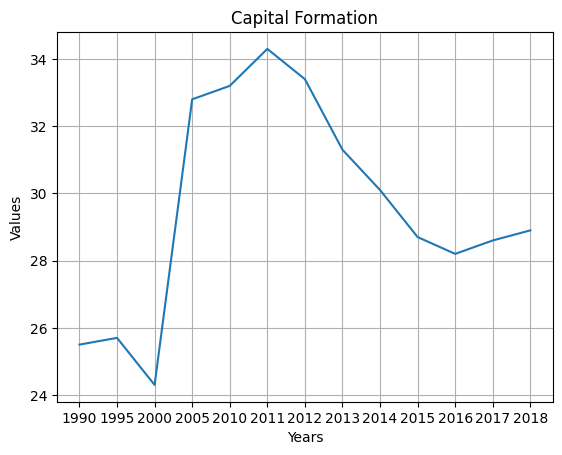

In [7]:
plt.title('Capital Formation')
plt.xlabel('Years')
plt.ylabel('Values')
plt.grid(True)
plt.plot(x, y)
plt.show()

In [8]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
predictions = regressor.predict(x_train)

In [9]:
print(predictions)

array([26.15664427, 27.07053908, 27.98443388, 28.89832869, 29.8122235 ,
       29.99500246, 30.17778142, 30.36056038, 30.54333934, 30.7261183 ,
       30.90889726, 31.09167622, 31.27445519])

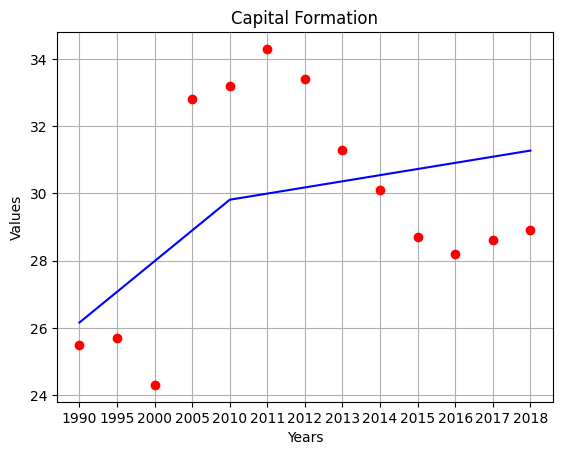

In [10]:
plt.title('Capital Formation')
plt.xlabel('Years')
plt.ylabel('Values')
plt.grid(True)
plt.plot(x, predictions, 'b-', x, y, 'ro')
plt.show()